In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from qtrl.fitting.simple_fitting import *
import scipy

# Qubit Flux Offsets and Periods

```python
flux_pars = {1: {'offset_current': 0.00012071351127562245,
  'current_period': 0.0009449645754119197},
 2: {'offset_current': 9.387272519735548e-05,
  'current_period': 0.0008992808601709195},
 3: {'offset_current': 0.00011103881316814476,
  'current_period': 0.0009446523114078722},
 4: {'offset_current': 9.657573579622088e-05,
  'current_period': 0.0009955588588954156},
 5: {'offset_current': 0.0001365845300537428,
  'current_period': 0.0013382045210152216},
 6: {'offset_current': -0.00013701594927564823,
  'current_period': 0.0012591042429408355},
 7: {'offset_current': -0.00012450991391524567,
  'current_period': 0.001215971154655347},
 8: {'offset_current': -0.00012613510022721594,
  'current_period': 0.001328690718076326}}
```

# Qubit-Cavity Avoided Crossings

For each qubit the raw S21 data showing the avoided crossing is plotted. The two polariton peaks are extracted and the avoided crossing is fit to find the center. Additionally hyperparameters like power, IF bandwidth, etc. are included. For all measurements a 20dB attenuator is attached at the qubit drive port of the VNA.

## Q4

```python
vna.start(5.17e9)
vna.stop(5.28e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-45)
vna.if_bandwidth(0.02e3)
vna.averages(1)
vna.averages_enabled(True)
vna.ports[2].source_power(0)
```

In [2]:
df = pd.read_csv('bus-Q4-AC-1photon-13.csv')
currs = np.array(np.unique(df['current']))
freqs = np.array(np.unique(df['frequency']))
phase = np.unwrap(np.array(df['phase']).reshape([len(currs), len(freqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)

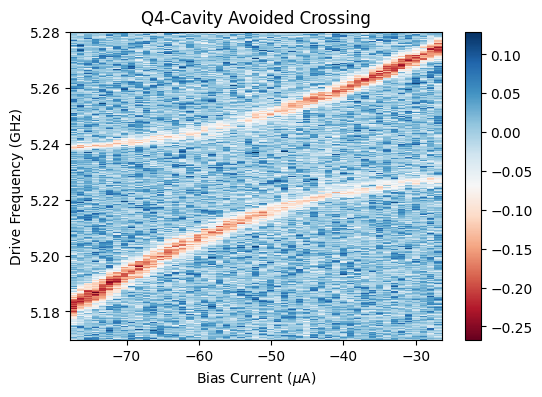

In [3]:
plt.figure(figsize=(6,4))
plt.pcolor(currs*1e6, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title('Q4-Cavity Avoided Crossing')
plt.xlabel('Bias Current ($\mu$A)')
plt.ylabel('Drive Frequency (GHz)')
plt.show()

In [4]:
fs = []
for i, cur in enumerate(currs):
    if True:
        y = -phase[:,i]
        y = scipy.signal.savgol_filter(y, 21, 3)
        fs.append(freqs[scipy.signal.find_peaks(y, height=0.05, distance=40)[0]])

In [5]:
LOW = False
BOTH = True
HIGH = False
cL = []
cH = []
cD = []
fsL = []
fsH = []
fsD = []
for i in range(len(fs)):
    if len(fs[i]) > 1:
        BOTH = True
        LOW = False
        HIGH = False
    if len(fs[i]) == 1 and BOTH:
        BOTH = False
        HIGH = True
        LOW = False
    # print(BOTH, LOW, HIGH)
    if LOW:
        fsL.append(fs[i][0])
        cL.append(currs[i])
    if BOTH:
        fsL.append(fs[i][0])
        cL.append(currs[i])
        fsH.append(fs[i][-1])
        cH.append(currs[i])
        fsD.append(fs[i][-1]-fs[i][0])
        cD.append(currs[i])
    if HIGH:
        fsH.append(fs[i][0])
        cH.append(currs[i])
cL = np.array(cL)
cH = np.array(cH)
fsL = np.array(fsL)
fsH = np.array(fsH)
cD = np.array(cD)
fsD = np.array(fsD)

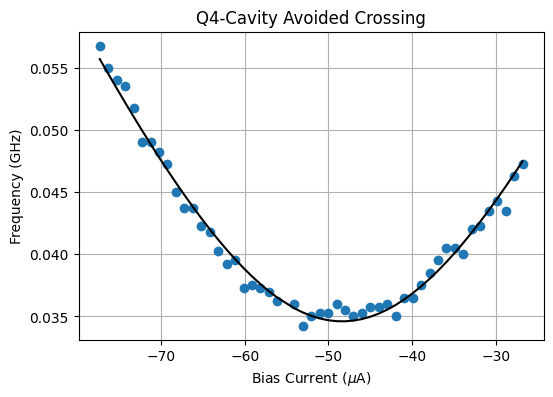

In [6]:
result = hyperbola_fit(cD, fsD)
plt.figure(figsize=(6,4))
plt.title('Q4-Cavity Avoided Crossing')
plt.plot(cD*1e6, fsD/1e9, 'o')
plt.plot(cD*1e6, result['y_fit']/1e9, color='k')
plt.xlabel('Bias Current ($\mu$A)')
plt.ylabel('Frequency (GHz)')
plt.grid()
plt.show()

In [7]:
result['params']

{'a': 1508123782452.8662,
 'x0': -4.837041070561294e-05,
 'b': 2.2943028740908664e-05}

## Q5

```python
vna.start(5.19e9)
vna.stop(5.30e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-48)
vna.if_bandwidth(0.2e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-5)
```

In [8]:
df = pd.read_csv('bus-Q5-AC-1photon-16.csv')
currs = np.array(np.unique(df['current']))
freqs = np.array(np.unique(df['frequency']))
phase = np.unwrap(np.array(df['phase']).reshape([len(currs), len(freqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)

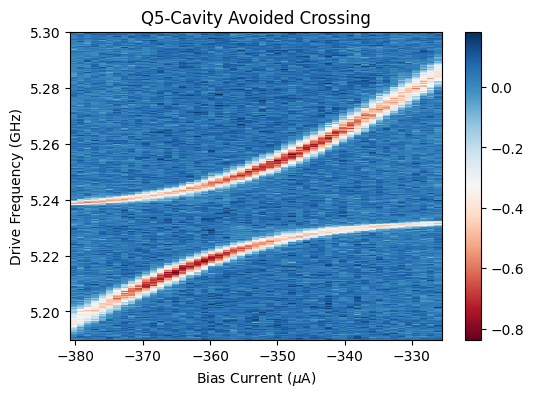

In [9]:
plt.figure(figsize=(6,4))
plt.pcolor(currs*1e6, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title('Q5-Cavity Avoided Crossing')
plt.xlabel('Bias Current ($\mu$A)')
plt.ylabel('Drive Frequency (GHz)')
plt.show()

In [10]:
fs = []
for i, cur in enumerate(currs):
    if True:
        y = -phase[:,i]
        y = scipy.signal.savgol_filter(y, 21, 3)
        fs.append(freqs[scipy.signal.find_peaks(y, height=0.25, distance=40)[0]])

In [11]:
LOW = False
BOTH = True
HIGH = False
cL = []
cH = []
cD = []
fsL = []
fsH = []
fsD = []
for i in range(len(fs)):
    if len(fs[i]) > 1:
        BOTH = True
        LOW = False
        HIGH = False
    if len(fs[i]) == 1 and BOTH:
        BOTH = False
        HIGH = True
        LOW = False
    # print(BOTH, LOW, HIGH)
    if LOW:
        fsL.append(fs[i][0])
        cL.append(currs[i])
    if BOTH:
        fsL.append(fs[i][0])
        cL.append(currs[i])
        fsH.append(fs[i][-1])
        cH.append(currs[i])
        fsD.append(fs[i][-1]-fs[i][0])
        cD.append(currs[i])
    if HIGH:
        fsH.append(fs[i][0])
        cH.append(currs[i])
cL = np.array(cL)
cH = np.array(cH)
fsL = np.array(fsL)
fsH = np.array(fsH)
cD = np.array(cD)
fsD = np.array(fsD)

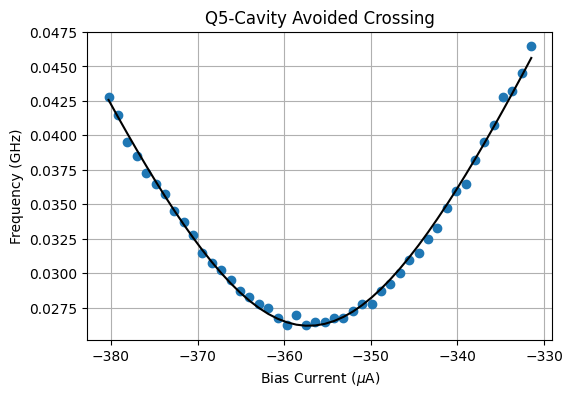

In [12]:
result = hyperbola_fit(cD, fsD)
plt.figure(figsize=(6,4))
plt.title('Q5-Cavity Avoided Crossing')
plt.plot(cD*1e6, fsD/1e9, 'o')
plt.plot(cD*1e6, result['y_fit']/1e9, color='k')
plt.xlabel('Bias Current ($\mu$A)')
plt.ylabel('Frequency (GHz)')
plt.grid()
plt.show()

In [13]:
result['params']

{'a': 1453173658874.2263,
 'x0': -0.0003571795227012449,
 'b': 1.802779201463888e-05}

## Q6

```python
vna.start(5.18e9)
vna.stop(5.31e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-45)
vna.if_bandwidth(0.2e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-5)
```

In [14]:
df = pd.read_csv('bus-Q6-AC-1photon-17.csv')
currs = np.array(np.unique(df['current']))
freqs = np.array(np.unique(df['frequency']))
phase = np.unwrap(np.array(df['phase']).reshape([len(currs), len(freqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)

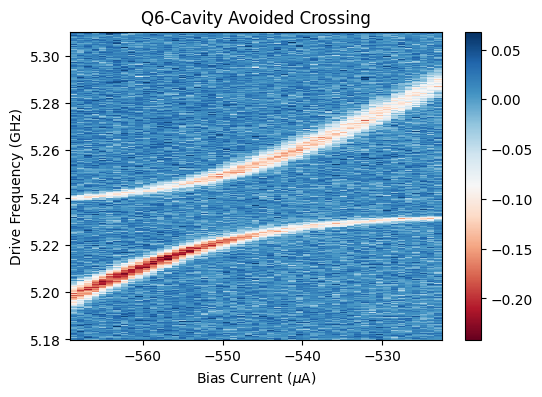

In [15]:
plt.figure(figsize=(6,4))
plt.pcolor(currs*1e6, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title('Q6-Cavity Avoided Crossing')
plt.xlabel('Bias Current ($\mu$A)')
plt.ylabel('Drive Frequency (GHz)')
plt.show()

In [16]:
fs = []
for i, cur in enumerate(currs):
    if True:
        y = -phase[:,i]
        y = scipy.signal.savgol_filter(y, 21, 3)
        fs.append(freqs[scipy.signal.find_peaks(y, height=0.05, distance=40)[0]])

In [17]:
LOW = False
BOTH = True
HIGH = False
cL = []
cH = []
cD = []
fsL = []
fsH = []
fsD = []
for i in range(len(fs)):
    if len(fs[i]) > 1:
        BOTH = True
        LOW = False
        HIGH = False
    if len(fs[i]) == 1 and BOTH:
        BOTH = False
        HIGH = True
        LOW = False
    # print(BOTH, LOW, HIGH)
    if LOW:
        fsL.append(fs[i][0])
        cL.append(currs[i])
    if BOTH:
        fsL.append(fs[i][0])
        cL.append(currs[i])
        fsH.append(fs[i][-1])
        cH.append(currs[i])
        fsD.append(fs[i][-1]-fs[i][0])
        cD.append(currs[i])
    if HIGH:
        fsH.append(fs[i][0])
        cH.append(currs[i])
cL = np.array(cL)
cH = np.array(cH)
fsL = np.array(fsL)
fsH = np.array(fsH)
cD = np.array(cD)
fsD = np.array(fsD)

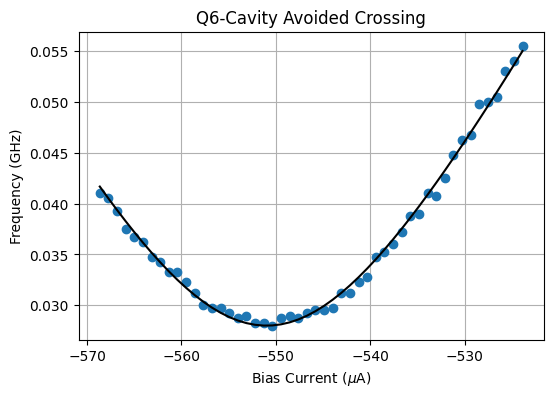

In [18]:
result = hyperbola_fit(cD, fsD)
plt.figure(figsize=(6,4))
plt.title('Q6-Cavity Avoided Crossing')
plt.plot(cD*1e6, fsD/1e9, 'o')
plt.plot(cD*1e6, result['y_fit']/1e9, color='k')
plt.xlabel('Bias Current ($\mu$A)')
plt.ylabel('Frequency (GHz)')
plt.grid()
plt.show()

In [19]:
result['params']

{'a': 1745253197352.283,
 'x0': -0.0005509678864697227,
 'b': 1.6048579027901953e-05}

## Q7

```python
vna.start(5.18e9)
vna.stop(5.31e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-42)
vna.if_bandwidth(0.2e3)
vna.averages(30)
vna.averages_enabled(True)
vna.ports[2].source_power(0)
```

In [20]:
df = pd.read_csv('bus-Q7-AC-1photon-19.csv')
currs = np.array(np.unique(df['current']))
freqs = np.array(np.unique(df['frequency']))
phase = np.unwrap(np.array(df['phase']).reshape([len(currs), len(freqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)

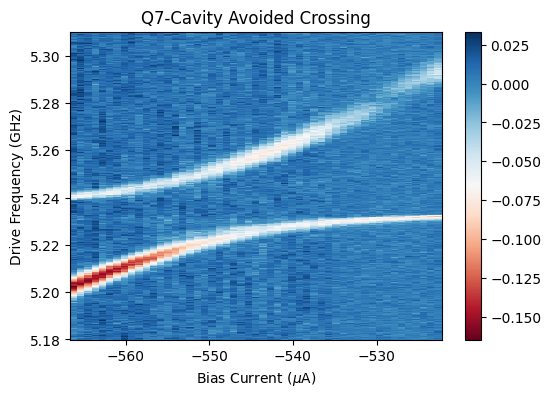

In [21]:
plt.figure(figsize=(6,4))
plt.pcolor(currs*1e6, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title('Q7-Cavity Avoided Crossing')
plt.xlabel('Bias Current ($\mu$A)')
plt.ylabel('Drive Frequency (GHz)')
plt.show()

In [22]:
fs = []
for i, cur in enumerate(currs):
    if True:
        y = -phase[:,i]
        y = scipy.signal.savgol_filter(y, 21, 3)
        fs.append(freqs[scipy.signal.find_peaks(y, height=0.02, distance=40)[0]])

In [23]:
LOW = False
BOTH = True
HIGH = False
cL = []
cH = []
cD = []
fsL = []
fsH = []
fsD = []
for i in range(len(fs)):
    if len(fs[i]) > 1:
        BOTH = True
        LOW = False
        HIGH = False
    if len(fs[i]) == 1 and BOTH:
        BOTH = False
        HIGH = True
        LOW = False
    # print(BOTH, LOW, HIGH)
    if LOW:
        fsL.append(fs[i][0])
        cL.append(currs[i])
    if BOTH:
        fsL.append(fs[i][0])
        cL.append(currs[i])
        fsH.append(fs[i][-1])
        cH.append(currs[i])
        fsD.append(fs[i][-1]-fs[i][0])
        cD.append(currs[i])
    if HIGH:
        fsH.append(fs[i][0])
        cH.append(currs[i])
cL = np.array(cL)
cH = np.array(cH)
fsL = np.array(fsL)
fsH = np.array(fsH)
cD = np.array(cD)
fsD = np.array(fsD)

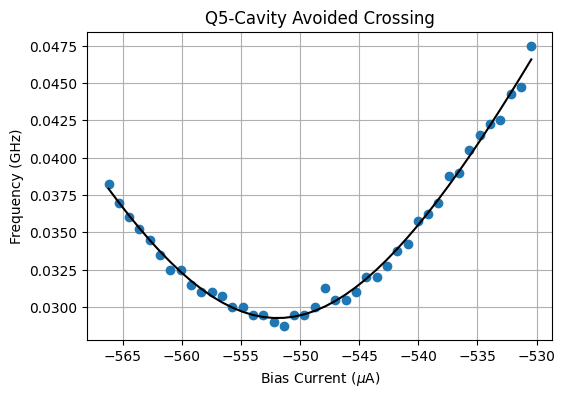

In [24]:
result = hyperbola_fit(cD[:-7], fsD[:-7])
plt.figure(figsize=(6,4))
plt.title('Q5-Cavity Avoided Crossing')
plt.plot(cD[:-7]*1e6, fsD[:-7]/1e9, 'o')
plt.plot(cD[:-7]*1e6, result['y_fit']/1e9, color='k')
plt.xlabel('Bias Current ($\mu$A)')
plt.ylabel('Frequency (GHz)')
plt.grid()
plt.show()

In [25]:
result['params']

{'a': 1689612692041.9487,
 'x0': -0.0005519050081825824,
 'b': 1.7319103576231574e-05}

# Photon Number Splitting Measurements

For all PNS measurements the Aspin20G RF source is used for the cavity drive. The signal passes through the 1/2 port of ZFRSC-123-S+ splitter to allow multiplexing of an additional drive (which was not used in any of the following measurements). 20dB attenuator is applied to the output of the Aspin20G and a second 20dB attenuator is added to the qubit drive relative to the above avoided crossing measurements. Qubits that are not directly involved in the measurement are biased far from the cavity frequency (at the top of their tuning curves for Q5-Q8 and the bottom of their tuning curves for Q1-Q4). The cavity boundary SQUIDs are both biased to $F=0$ flux throughout all measurements

## $N=0$ Blockade Emitters

Here are the standard PNS spectroscopy measurements which serve as a baseline to compare the blockade case to.

First we look at the cavity drive frequency dependence at various cavity drive amplitudes

```python
vna.start(5.305e9)
vna.stop(5.375e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-30)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(0)
```

In [2]:
idxs = np.array([29, 30, 31, 32])
pows = np.array([-20, -10, -5, 5])

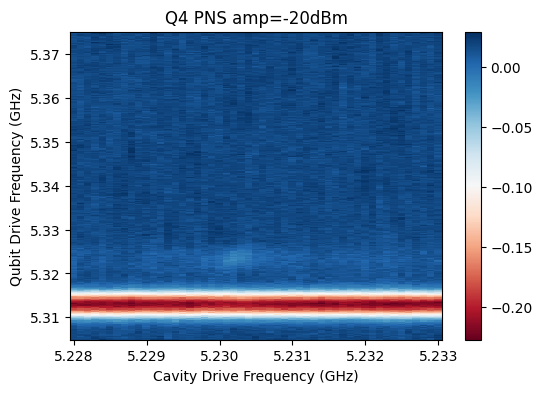

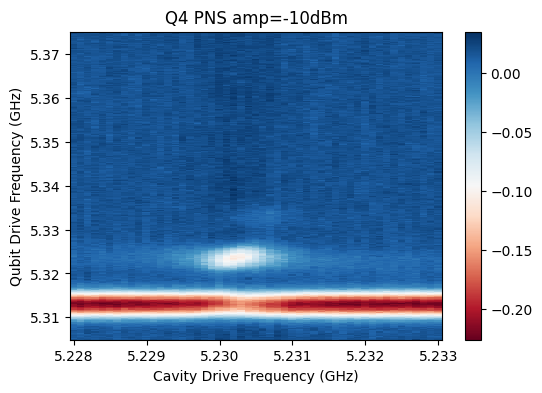

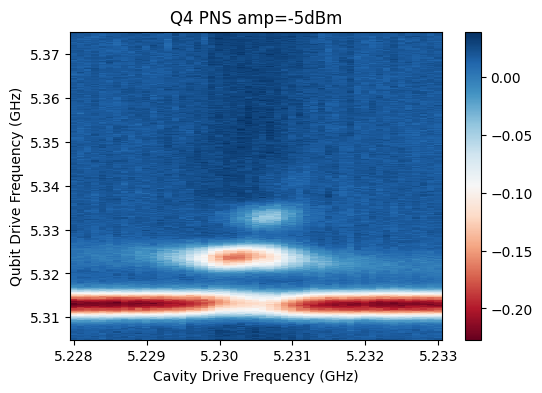

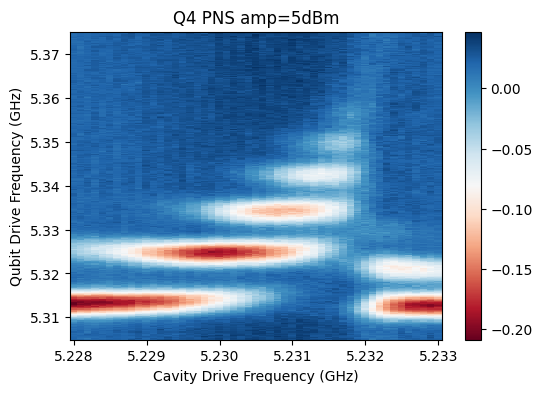

In [3]:
for i, (idx, amp) in enumerate(zip(idxs, pows)):    
    df = pd.read_csv(f'bus-Q4-pns_{idx}.csv')
    bfreqs = np.array(np.unique(df['frequency']))
    qfreqs = np.array(np.unique(df['frequency.1']))
    phase = np.unwrap(np.array(df['phase']).reshape([len(bfreqs), len(qfreqs)]))
    phase = phase.transpose()
    phase = phase - np.mean(phase, axis=0)
    plt.figure(figsize=(6,4))
    plt.pcolor(bfreqs/1e9, qfreqs/1e9, phase, cmap='RdBu')
    plt.colorbar()
    plt.title(f'Q4 PNS amp={amp}dBm')
    plt.xlabel('Cavity Drive Frequency (GHz)')
    plt.ylabel('Qubit Drive Frequency (GHz)')
    plt.show()

The optimal drive frequency was found to be the frequency where the 1-photon feature first appeared at the lowest drive amplitude, 5.2302GHz. Next we can see the amplitude dependence at this drive frequency.

```python
vna.start(5.305e9)
vna.stop(5.375e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-30)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(0)
```

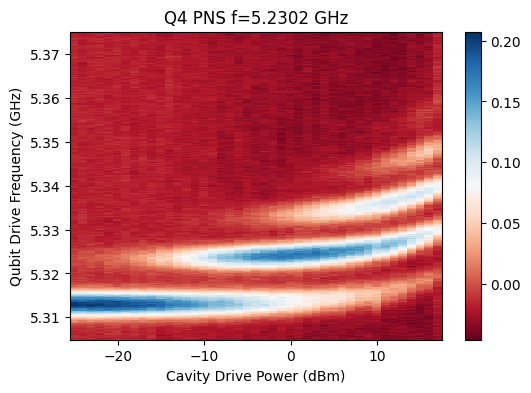

In [47]:
df = pd.read_csv(f'bus-Q4-pns_34.csv')
df1 = pd.read_csv(f'bus-Q4-pns_35.csv')
power = np.array(np.unique(df['power']))
power1 = np.array(np.unique(df1['power']))
powerc = np.concatenate([power, power1])
freqs = np.array(np.unique(df['frequency']))
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase1 = np.flip(np.unwrap(np.array(df1['phase']).reshape([len(power1), len(freqs)])), axis=0)
phasec = np.concatenate([phase, phase1])
phasec = phasec.transpose()
phasec = phasec - np.mean(phasec, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(powerc, freqs/1e9, -phasec, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.2302 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

In [48]:
np.max(powerc)

17.0

In [39]:
fs = np.zeros([len(powerc), 5])
hs = np.zeros([len(powerc), 5])
alpha_est = np.zeros(len(powerc))
for i in range(len(powerc)):
    y = phasec[:, i]
    y = scipy.signal.savgol_filter(y, 21, 3)
    # pks = scipy.signal.find_peaks(-y, height=-0.011, width=10)
    pks = scipy.signal.find_peaks(-y, height=-0.011, width=10)
    for j in range(np.min([5, len(pks[0])])):
        fs[i, j] = freqs[pks[0][j]]
        hs[i, j] = np.max([pks[1]['peak_heights'][j], 0])
    hs[i, :] = (hs[i, :] - np.min(hs[i, :]))/np.sum(hs[i, :])
    alpha_est[i] = np.sum(hs[i,:]*np.arange(5))

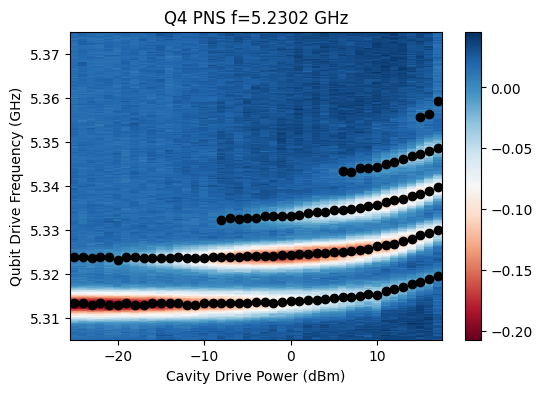

In [40]:
plt.figure(figsize=(6,4))
plt.pcolor(powerc, freqs/1e9, phasec, cmap='RdBu')
plt.colorbar()
plt.plot(powerc, fs/1e9, 'o', color='k')
plt.title(f'Q4 PNS f=5.2302 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.ylim([np.min(freqs/1e9), None])
plt.show()

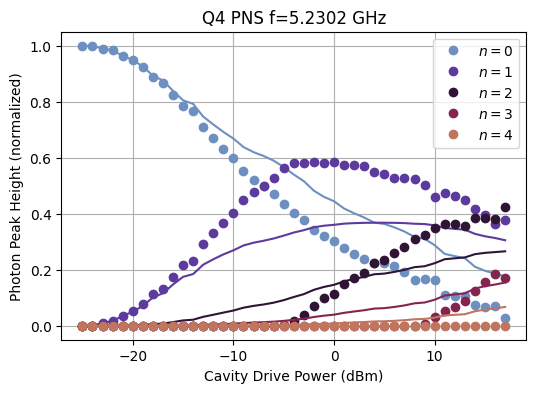

In [41]:
colors = plt.cm.twilight(np.linspace(0.2, 0.8, 5))
plt.figure(figsize=(6,4))
for i in range(5):
    y = hs[:, i]
    x = powerc
    plt.plot(x, y, 'o', color=colors[i], label=rf'$n={i}$')
    z = alpha_est
    plt.plot(x, (z**i)*np.exp(-z)/(np.math.factorial(i)), '-', color=colors[i])
plt.title(f'Q4 PNS f=5.2302 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Photon Peak Height (normalized)')
plt.grid()
plt.legend()
plt.show()

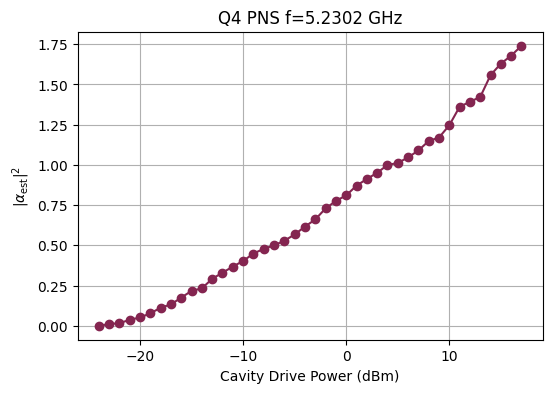

In [8]:
colors = plt.cm.twilight(np.linspace(0.2, 0.8, 5))
plt.figure(figsize=(6,4))
plt.plot(powerc[1:], alpha_est[1:], 'o-', color=colors[-2])
plt.title(f'Q4 PNS f=5.2302 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel(r'$|\alpha_{\mathrm{est}}|^{2}$')
plt.grid()
plt.show()

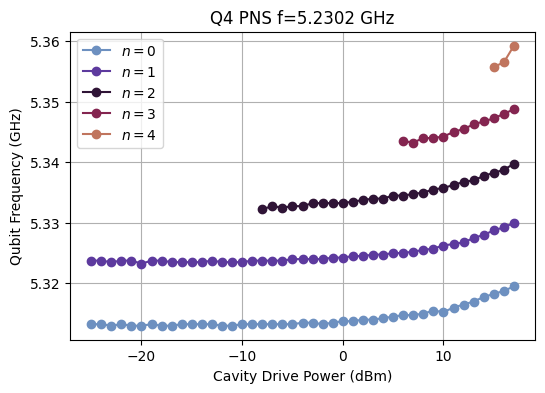

In [9]:
colors = plt.cm.twilight(np.linspace(0.2, 0.8, 5))
plt.figure(figsize=(6,4))
for i in range(5):
    y = fs[fs[:, i] > 0 , i]/1e9
    x = powerc[-len(y):]
    plt.plot(x, y, 'o-', color=colors[i], label=rf'$n={i}$')
plt.title(f'Q4 PNS f=5.2302 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Frequency (GHz)')
plt.grid()
plt.legend()
plt.show()

In [42]:
fs

array([[5.31325e+09, 5.32375e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31325e+09, 5.32375e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31300e+09, 5.32350e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31325e+09, 5.32375e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31300e+09, 5.32375e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31300e+09, 5.32325e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31325e+09, 5.32375e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31300e+09, 5.32375e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31300e+09, 5.32350e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31325e+09, 5.32350e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31325e+09, 5.32350e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31325e+09, 5.32350e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31325e+09, 5.32375e+09, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.31300e+09, 5.32350e+09, 0.00

In [43]:
chis = np.zeros([len(powerc), 5])
for i in range(len(powerc)):
    for j in range(4):
        if fs[i, j] > 0 and fs[i, j+1] > 0:
            chis[i, j] = fs[i, j+1] - fs[i, j]

In [11]:
delt = fs[0,0]/1e9 - 5.231
g = 0.0165
al = 0.220
chi_est = (g**2)/(delt*(1-delt/al))

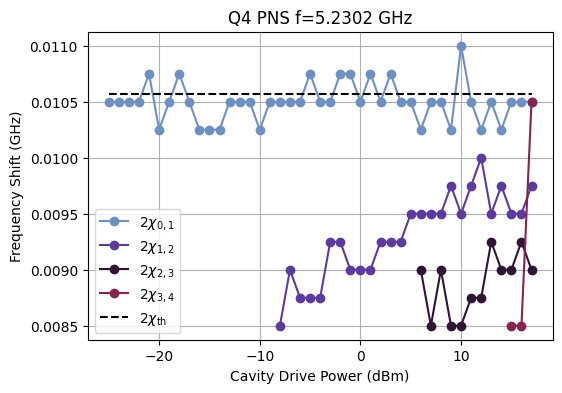

In [12]:
colors = plt.cm.twilight(np.linspace(0.2, 0.8, 5))
labels = ['$2\chi_{0,1}$', '$2\chi_{1,2}$', '$2\chi_{2,3}$', '$2\chi_{3,4}$']
plt.figure(figsize=(6,4))
for i in range(4):
    y = chis[chis[:, i] > 0 , i]/1e9
    x = powerc[-len(y):]
    plt.plot(x, y, 'o-', color=colors[i], label=labels[i])
plt.hlines([2*chi_est], np.min(powerc), np.max(powerc), color='k', linestyle='dashed', label='$2\chi_{\mathrm{th}}$')
plt.title(f'Q4 PNS f=5.2302 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Frequency Shift (GHz)')
plt.grid()
plt.legend()
plt.show()

## Simulation Data

In [13]:
df = pd.read_csv(f'no_blockade.csv')
amps = np.array(np.unique(df['drives']))
freqs = np.array(np.unique(df['freqs']))
pops = np.array(df['pops']).reshape([len(amps), len(freqs)])

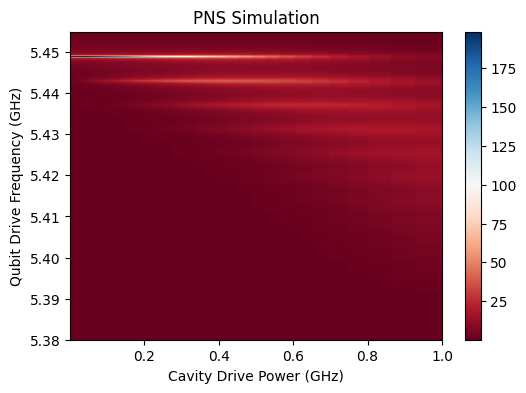

In [14]:
plt.figure(figsize=(6,4))
plt.pcolor(amps, freqs, np.sqrt(pops.transpose()), cmap='RdBu')
plt.colorbar()
plt.title(f'PNS Simulation')
plt.xlabel('Cavity Drive Power (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.ylim(5.38, None)
plt.xlim(None, 1)
plt.show()

In [31]:
fs = np.zeros([len(amps), 9])
hs = np.zeros([len(amps), 9])
alpha_est = np.zeros(len(amps))
for i in range(len(amps)):
    y = pops[i, :]
    # plt.figure()
    # plt.plot(freqs, y)
    # plt.show()
    # y = scipy.signal.savgol_filter(y, 11, 3)
    # pks = scipy.signal.find_peaks(-y, height=-0.011, width=10)
    pks = scipy.signal.find_peaks(y, height=0.01, width=0.5)
    pk_pos = np.flip(pks[0])
    pk_ht = np.flip(pks[1]['peak_heights'])
    # print(pks)
    for j in range(np.min([9, len(pk_pos)])):
        fs[i, j] = freqs[pk_pos[j]]
        hs[i, j] = np.max([pk_ht[j], 0])
    hs[i, :] = (hs[i, :] - np.min(hs[i, :]))/np.sum(hs[i, :])
    alpha_est[i] = np.sum(hs[i,:]*np.arange(9))

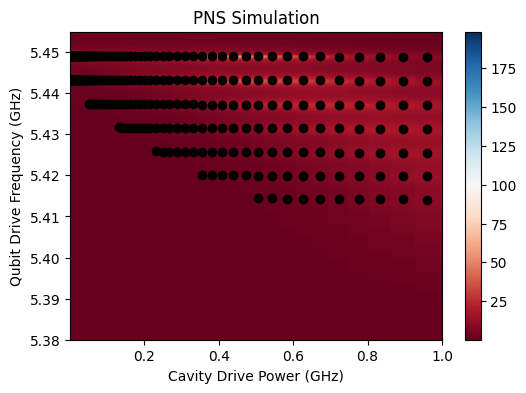

In [32]:
plt.figure(figsize=(6,4))
plt.pcolor(amps, freqs, np.sqrt(pops.transpose()), cmap='RdBu')
plt.colorbar()
plt.plot(amps, fs, 'o', color='k')
plt.title(f'PNS Simulation')
plt.xlabel('Cavity Drive Power (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.ylim(5.38, None)
plt.xlim(None, 1)
plt.show()

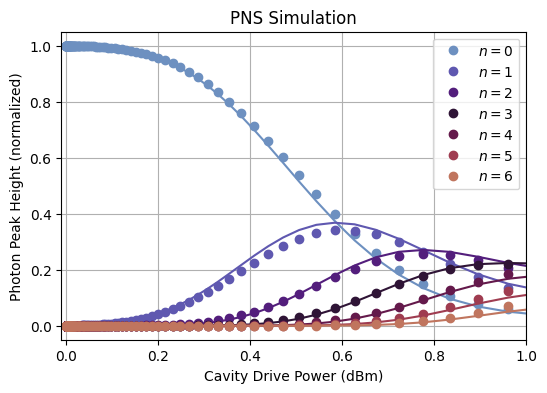

In [33]:
colors = plt.cm.twilight(np.linspace(0.2, 0.8, 7))
plt.figure(figsize=(6,4))
for i in range(7):
    y = hs[:, i]
    x = amps
    plt.plot(x, y, 'o', color=colors[i], label=rf'$n={i}$')
    z = alpha_est
    plt.plot(x, (z**i)*np.exp(-z)/(np.math.factorial(i)), '-', color=colors[i])
plt.title(f'PNS Simulation')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Photon Peak Height (normalized)')
plt.grid()
plt.legend()
plt.xlim(-0.01, 1)
plt.show()

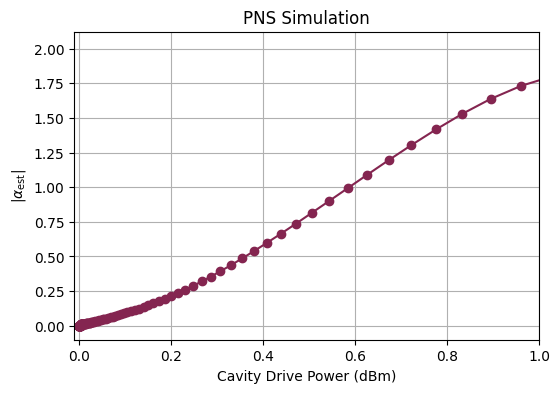

In [34]:
colors = plt.cm.twilight(np.linspace(0.2, 0.8, 5))
plt.figure(figsize=(6,4))
plt.plot(amps, np.sqrt(alpha_est), 'o-', color=colors[-2])
plt.title(f'PNS Simulation')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel(r'$|\alpha_{\mathrm{est}}|$')
plt.xlim(-0.01, 1)
plt.grid()
plt.show()

In [35]:
0.018**2 /(0.11)

0.002945454545454545

## N=1 Blockade Emitters

The above measurements were taken with the qubit biased to F=-0.08 to avoid a collision between the qubits 2-photon g-f transition and the cavity resonance frequency. However once other qubits are brought into resonance to create the blockade, the qubit g-f transition at F=0 is in the middle of the two polariton frequencies. The qubit can be returned to this flux bias to take advantage of the narrower qubit linewidth obtained at the flux insensitive point of the qubit tuning curve. 

First qubit 5 is brought into resonance with the cavity. At low cavity drive power we use the PNS effect to find the polariton frequencies.

```python
vna.start(5.340e9)
vna.stop(5.400e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

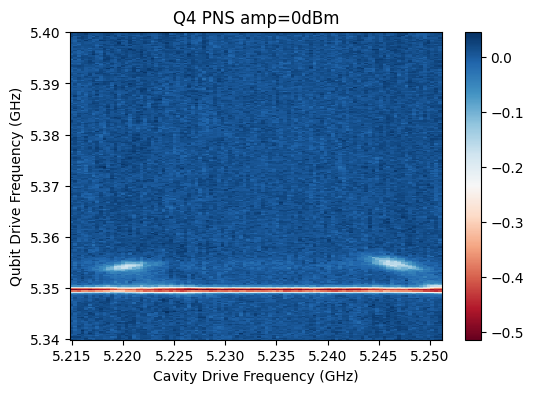

In [29]:
df = pd.read_csv(f'bus-Q4-pns_53.csv')
bfreqs = np.array(np.unique(df['frequency']))
qfreqs = np.array(np.unique(df['frequency.1']))
phase = np.unwrap(np.array(df['phase']).reshape([len(bfreqs), len(qfreqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(bfreqs/1e9, qfreqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS amp=0dBm')
plt.xlabel('Cavity Drive Frequency (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

Next we fix the cavity drive frequency at the two polariton frequencies and sweep drive amplitude to check for the appearence of higher photon lines in the qubit spectrum. First for the upper polariton

```python
vna.start(5.335e9)
vna.stop(5.405e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-35)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-5)
```

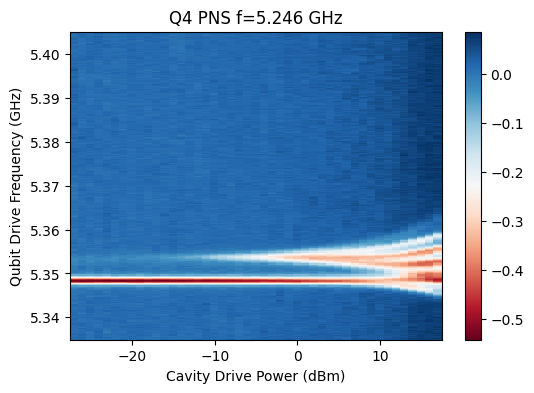

In [30]:
df = pd.read_csv(f'bus-Q4-pns_51.csv')
power = np.array(np.unique(df['power']))
freqs = np.array(np.unique(df['frequency']))
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.246 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

At N=1 there is some interesting structure in the high power spectrum which we zoom in on with a lower qubit drive power to resolve all the features

```python
vna.start(5.340e9)
vna.stop(5.370e9)
step_size = 0.15e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(50)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

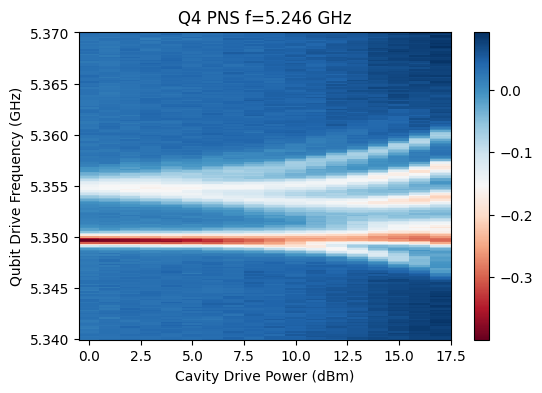

In [31]:
df = pd.read_csv(f'bus-Q4-pns_52.csv')
power = np.array(np.unique(df['power']))
freqs = np.array(np.unique(df['frequency']))
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.246 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

Now for the lower polariton

```python
vna.start(5.340e9)
vna.stop(5.370e9)
step_size = 0.15e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

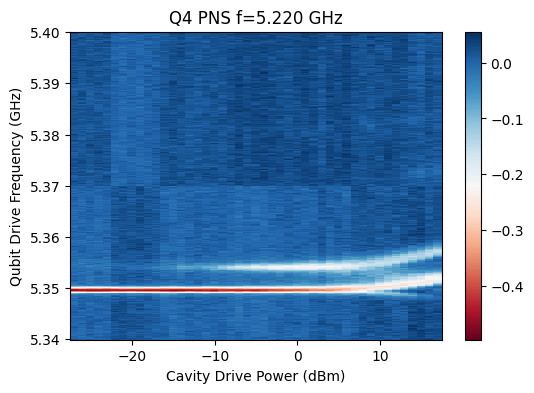

In [32]:
df = pd.read_csv(f'bus-Q4-pns_54.csv')
df1 = pd.read_csv(f'bus-Q4-pns_55.csv')
power = np.array(np.unique(df['power']))
freqs = np.array(np.unique(df['frequency']))
freqs1 = np.array(np.unique(df1['frequency']))
freqsc = np.concatenate([freqs, freqs1])
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase1 = np.flip(np.unwrap(np.array(df1['phase']).reshape([len(power), len(freqs1)])), axis=0)
phasec = np.concatenate([phase, phase1], axis=1)
phasec = phasec.transpose()
phasec = phasec - np.mean(phasec, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power, freqsc/1e9, phasec, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.220 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

## N=2 Blockade Emitters

Next we bring qubit 6 into resonance with the cavity as well.

```python
vna.start(5.345e9)
vna.stop(5.400e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

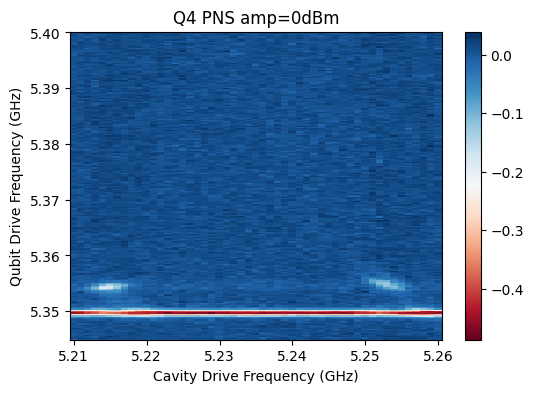

In [33]:
df = pd.read_csv(f'bus-Q4-pns_58.csv')
bfreqs = np.array(np.unique(df['frequency']))
qfreqs = np.array(np.unique(df['frequency.1']))
phase = np.unwrap(np.array(df['phase']).reshape([len(bfreqs), len(qfreqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(bfreqs/1e9, qfreqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS amp=0dBm')
plt.xlabel('Cavity Drive Frequency (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

Now the upper polariton

```python
vna.start(5.345e9)
vna.stop(5.400e9)
step_size = 0.15e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

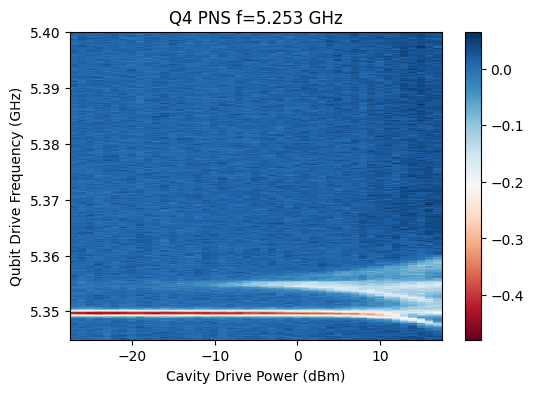

In [34]:
df = pd.read_csv(f'bus-Q4-pns_60.csv')
power = np.array(np.unique(df['power']))
freqs = np.array(np.unique(df['frequency']))
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.253 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

Now the lower polariton

```python
vna.start(5.345e9)
vna.stop(5.400e9)
step_size = 0.15e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

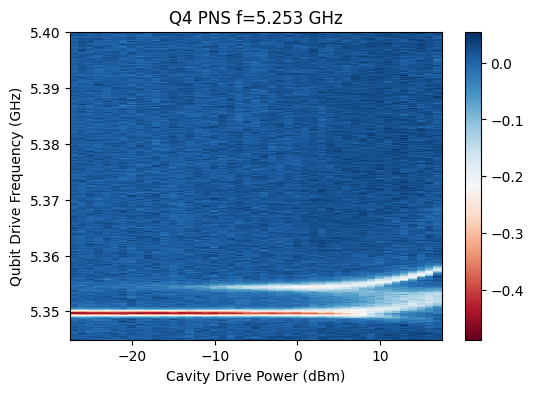

In [35]:
df = pd.read_csv(f'bus-Q4-pns_59.csv')
power = np.array(np.unique(df['power']))
freqs = np.array(np.unique(df['frequency']))
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.253 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

## N=3 Blockade Emitters

Finally we also bring qubit 7 into resonance

```python
vna.start(5.345e9)
vna.stop(5.365e9)
step_size = 0.25e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

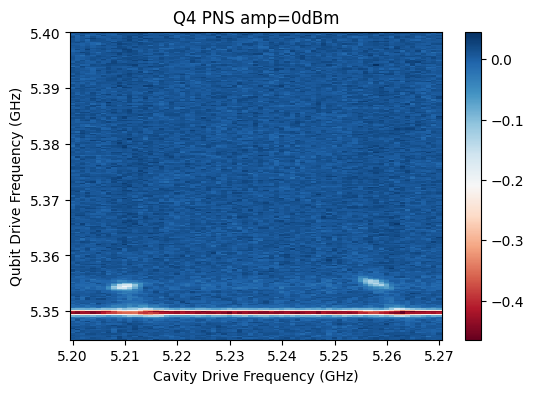

In [36]:
df = pd.read_csv(f'bus-Q4-pns_65.csv')
bfreqs = np.array(np.unique(df['frequency']))
qfreqs = np.array(np.unique(df['frequency.1']))
phase = np.unwrap(np.array(df['phase']).reshape([len(bfreqs), len(qfreqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(bfreqs/1e9, qfreqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS amp=0dBm')
plt.xlabel('Cavity Drive Frequency (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

Now at the upper polariton

```python
vna.start(5.345e9)
vna.stop(5.400e9)
step_size = 0.15e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

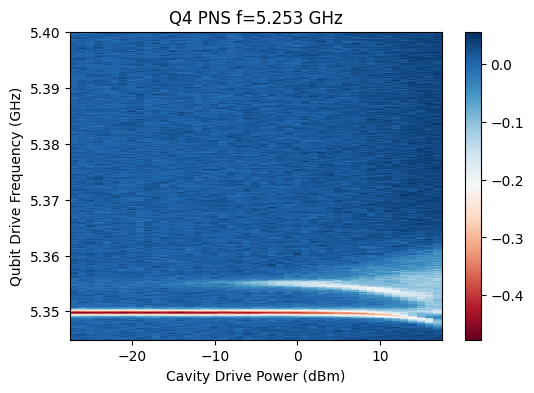

In [37]:
df = pd.read_csv(f'bus-Q4-pns_63.csv')
power = np.array(np.unique(df['power']))
freqs = np.array(np.unique(df['frequency']))
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.253 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

Now at the lower polariton

```python
vna.start(5.345e9)
vna.stop(5.400e9)
step_size = 0.15e6
npts = int(vna.span()/step_size) + 1
vna.points(npts)
vna.power(-40)
vna.if_bandwidth(0.1e3)
vna.averages(10)
vna.averages_enabled(True)
vna.ports[2].source_power(-10)
```

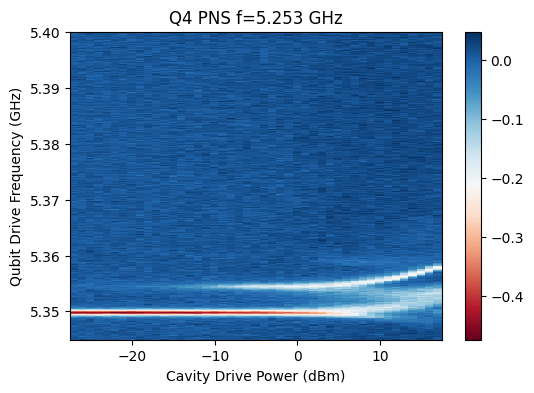

In [38]:
df = pd.read_csv(f'bus-Q4-pns_64.csv')
power = np.array(np.unique(df['power']))
freqs = np.array(np.unique(df['frequency']))
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(power, freqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS f=5.253 GHz')
plt.xlabel('Cavity Drive Power (dBm)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

# Polariton Frequency Splitting